In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.utils

data = pd.read_csv("student-mat.csv", sep=";")
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head()) # delete after explaining
# Show the first 5 rows of the selected columns: G1, G2, G3, studytime, failures, absences



   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [ ]:
predict = "G3"
x = np.array(data.drop([predict], axis=1))  # Fix here
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)  # Fix here
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
accuracy = linear.score(x_test, y_test)
print(accuracy)


0.7646755622604551


In [ ]:
accuracy = linear.score(x_test, y_test)
print(accuracy)

0.7646755622604551


In [ ]:
print("Coefficient: \n", linear.coef_)
print("intercept: \n", linear.intercept_)
predictions = linear.predict(x_test)


Coefficient: 
 [ 0.14177546  0.9740384  -0.20594858 -0.29429338  0.03006735]
intercept: 
 -1.1588606660604963


In [ ]:
results = pd.DataFrame(x_test, columns=["G1", "G2", "Study Time", "Failures", "Absences"])
results["Predicted G3"] = predictions
results["Actual G3"] = y_test
print("\nPredictions Table:")
print(results.to_string(index=False))



Predictions Table:
 G1  G2  Study Time  Failures  Absences  Predicted G3  Actual G3
 11  10           3         0         4      9.643477         10
 13  11           2         0         2     11.046880         11
  4   0           1         2         0     -1.386294          0
  8   8           2         0         0      7.355753          0
 14  13           2         0         4     13.196867         13
  8   7           2         3         8      5.739373          8
  6   7           2         0         0      6.098164          0
  3   5           2         1         8      3.671006          5
  8   8           2         0         0      7.355753          0
 17  18           2         0        21     19.003530         18
  8   9           2         0         4      8.450061         10
 14  11           1         0        18     11.875682         13
  9   8           2         1         0      7.203235          0
 17  16           2         0         0     16.424039         17
 13  

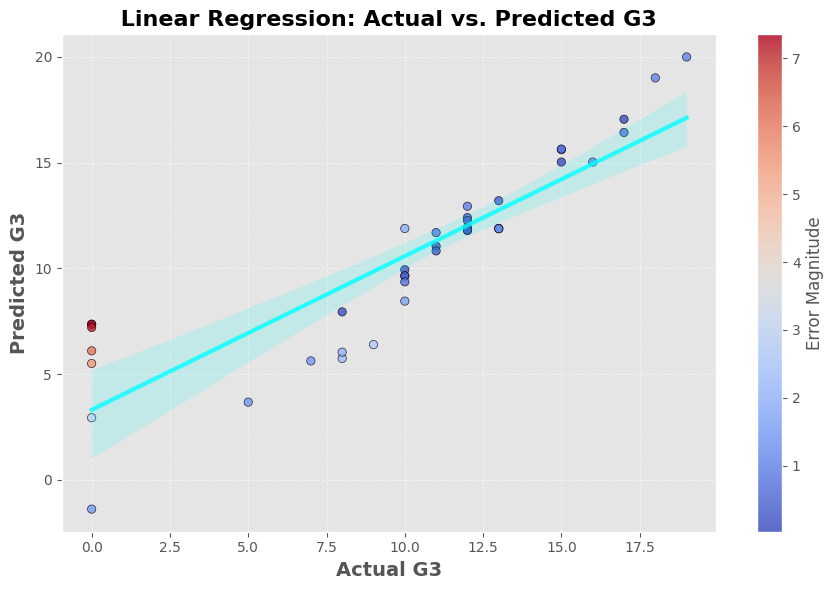

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Style settings
plt.style.use("ggplot")

# Create figure
plt.figure(figsize=(9, 6))

# Create a colormap based on actual G3 values
colors = np.abs(y_test - predictions)  # Difference between actual and predicted

# Scatter plot with color gradient
scatter = plt.scatter(y_test, predictions, c=colors, cmap="coolwarm", edgecolors="black", alpha=0.8)

# Regression line with glow effect
sns.regplot(x=y_test, y=predictions, scatter=False, color="cyan", line_kws={"linewidth": 3, "alpha": 0.8})

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Error Magnitude", fontsize=12)

# Labels and title
plt.xlabel("Actual G3", fontsize=14, fontweight="bold")
plt.ylabel("Predicted G3", fontsize=14, fontweight="bold")
plt.title(" Linear Regression: Actual vs. Predicted G3 ", fontsize=16, fontweight="bold")
plt.tight_layout()
# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


In [ ]:
accuracy

0.7646755622604551

In [ ]:
uploaded


{'student-mat.csv': b'school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3\n"GP";"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;6;"5";"6";6\n"GP";"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;4;"5";"5";6\n"GP";"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;3;"yes";"no";"yes";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;10;"7";"8";10\n"GP";"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";3;2;2;1;1;5;2;"15";"14";15\n"GP";"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"father";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";4;3;2;1;2;5;4;"6";"10";10\n"GP";"M";16;"U";"LE3";"T";4;3;"service

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 6.842646338371618
Root Mean Squared Error: 2.6158452435822
